In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

plt.rcParams['font.family'] = 'serif'
plt.rcParams.update({'font.size': 20})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 20})

In [2]:
df_all_x =pd.read_csv('../data/processed/0.1-initial-exploration.csv')
dat = df_all_x[df_all_x['year'] > 2010]


data = pd.read_csv('../data/processed/0.3-feature-processing.csv')
data = data[data['year'] > 2015]
df_track_posiotion = dat[['gridStart','positionOrder','circuitId' ,'circuitName']]

In [3]:
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Australian Grand Prix'],'Australian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['European Grand Prix'],'European')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Emilia Romagna Grand Prix'],'Emilia R')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Belgian Grand Prix'],'Belgian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['German Grand Prix'],'German')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Austrian Grand Prix'],'Austrian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Malaysian Grand Prix'],'Malaysian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Tuscan Grand Prix'],'Tuscan')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Singapore Grand Prix'],'Singapore')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Monaco Grand Prix'],'Monaco')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Turkish Grand Prix'],'Turkish')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['United States Grand Prix'],'USA')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Brazilian Grand Prix'],'Brazilian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Italian Grand Prix'],'Italian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Russian Grand Prix'],'Russian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Qatar Grand Prix'],'Qatar')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Abu Dhabi Grand Prix'],'Abu Dhabi')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Canadian Grand Prix'],'Canadian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Bahrain Grand Prix'],'Bahrain')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Hungarian Grand Prix'],'Hungarian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['British Grand Prix'],'British')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Japanese Grand Prix'],'Japanese')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Spanish Grand Prix'],'Spanish')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Indian Grand Prix'],'Indian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Saudi Arabian Grand Prix'],'Saudi Ar')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Mexican Grand Prix'],'Mexican')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Dutch Grand Prix'],'Dutch')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Chinese Grand Prix'],'Chinese')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Korean Grand Prix'],'Korean')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['French Grand Prix'],'French')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Portuguese Grand Prix'],'Portuguese')

/var/folders/ww/g01k38ln5rx5dm_b_qtwpdkc0000gn/T/ipykernel_23545/2655020733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Australian Grand Prix'],'Australian')
/var/folders/ww/g01k38ln5rx5dm_b_qtwpdkc0000gn/T/ipykernel_23545/2655020733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['European Grand Prix'],'European')
/var/folders/ww/g01k38ln

In [4]:
df_2021 =pd.read_csv('../data/processed/0.1-initial-exploration.csv')
df_2021 = df_2021[df_2021['year'] == 2021]
df_2021 = df_2021[['gridStart','positionOrder','circuitId' ,'circuitName']]
df_2021_trackt_id = df_2021['circuitId'].to_numpy()

In [5]:
track_id_dublicated = df_track_posiotion['circuitId'].to_numpy()
track_id = []
for dublicates in track_id_dublicated:
    if dublicates not in track_id :
        if dublicates in df_2021_trackt_id:
            track_id.append(dublicates)

df_safe = df_track_posiotion
correlations = {}

for track in track_id:
    current = df_track_posiotion.loc[df_track_posiotion['circuitId'] == track]
    r = np.corrcoef(current['gridStart'],current['positionOrder'])
    correlations[current['circuitName'].iloc[0]] = r[0][1]
    df_track_posiotion = df_safe
    
correlations = dict(sorted(correlations.items(), key=lambda item: item[1]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


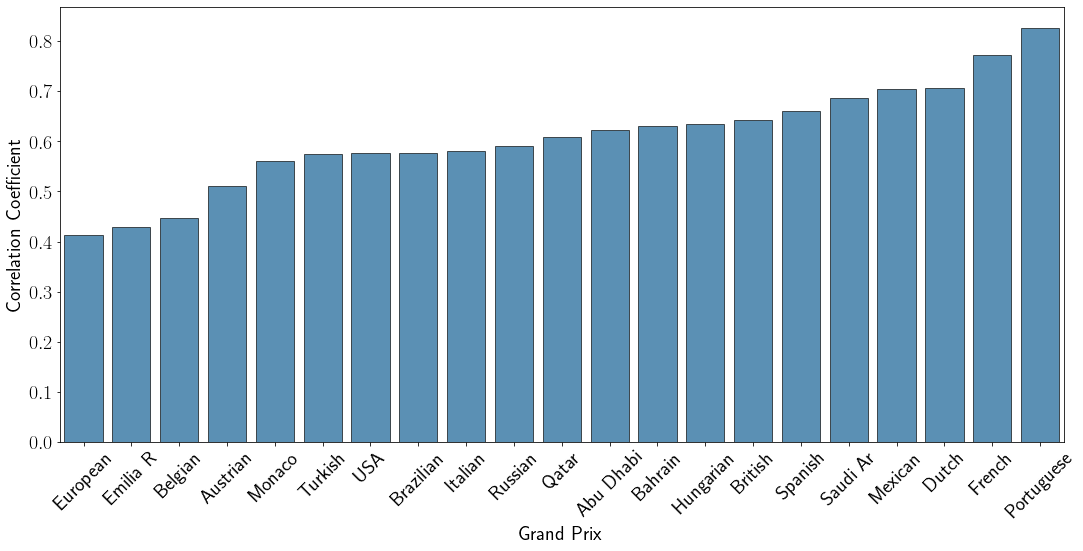

In [6]:
names = list(correlations.keys())
values = list(correlations.values())

plt.figure(figsize=(18, 8))
sb.barplot(x = names, y = values, color = sb.color_palette()[0], alpha = 0.8, linewidth=.8, edgecolor="black")
sb.set(style="darkgrid")
plt.tick_params(axis='x', rotation=45, labelsize = 20)
plt.tick_params(axis='y',  labelsize = 20)
plt.xlabel("Grand Prix",fontsize=20)
plt.ylabel("Correlation Coefficient",fontsize=20)
plt.savefig("../reports/figures/correlation_start_finish" + ".eps")

In [7]:
circuits = pd.read_csv('../data/raw/circuits.csv')
constructor_results = pd.read_csv('../data/raw/constructor_results.csv')
constructor_standings = pd.read_csv('../data/raw/constructor_standings.csv')
constructors = pd.read_csv('../data/raw/constructors.csv')
driver_standings = pd.read_csv('../data/raw/driver_standings.csv')
drivers = pd.read_csv('../data/raw/drivers.csv', parse_dates=[6])
lap_times = pd.read_csv('../data/raw/lap_times.csv')
pit_stops = pd.read_csv('../data/raw/pit_stops.csv')
qualifying = pd.read_csv('../data/raw/qualifying.csv')
races = pd.read_csv('../data/raw/races.csv', parse_dates=[5])
results = pd.read_csv('../data/raw/results.csv')
seasons = pd.read_csv('../data/raw/seasons.csv')
status = pd.read_csv('../data/raw/status.csv')

In [8]:
df = pd.merge(results,races[['raceId','year', 'name','round']],on='raceId', how='left')
df = pd.merge(df,drivers[['driverId','driverRef', 'nationality']],on='driverId', how='left')
df = pd.merge(df,constructors[['constructorId', 'name','nationality']],on='constructorId', how='left')

In [9]:
df.rename(columns={'rank': 'fastest_lap_rank', 'name_x': 'gp_name', 'nationality_x': 'driver_nationality', 'name_y': 'constructor_name', 'nationality_y': 'constructor_nationality', 'driver_ref': 'driver'}, inplace=True)
df = df.sort_values(by=['year', 'round','positionOrder'], ascending = [False, True, True])
df.reset_index(drop = True, inplace=True)
df['driverRef'] = df['driverRef'].replace(['max_verstappen'],'verstappen')
df['driverRef'] = df['driverRef'].replace(['mick_schumacher'],'schumacher')

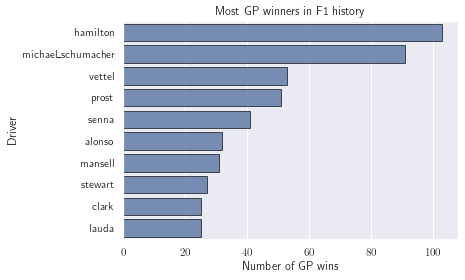

In [10]:
# drivers top 10 most wins
driver_racewins_count = df.loc[df['positionOrder'] == 1].groupby('driverRef')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
base_color = sb.color_palette()[0]
sb.barplot(data = driver_racewins_count.head(10), y = 'driverRef', x = 'positionOrder', color = base_color, alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most GP winners in F1 history')
plt.ylabel('Driver')
plt.xlabel('Number of GP wins');

Text(0.5, 0, 'Number of GP wins')

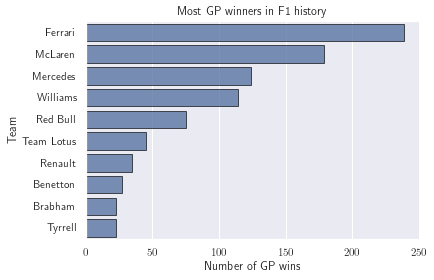

In [11]:
# constructor teams top 10 most wins
driver_racewins_count = df.loc[df['positionOrder'] == 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
base_color = sb.color_palette()[0]
sb.barplot(data = driver_racewins_count.head(10), y = 'constructor_name', x = 'positionOrder', color = base_color, alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most GP winners in F1 history')
plt.ylabel('Team')
plt.xlabel('Number of GP wins')

In [12]:
current_drivers = df.loc[df['year'] == 2021].driverRef.drop_duplicates()
driver_positions_count = df.loc[df['driverRef'].isin(current_drivers) & (df['year'] == 2021)].sort_values(by=['constructor_name'])

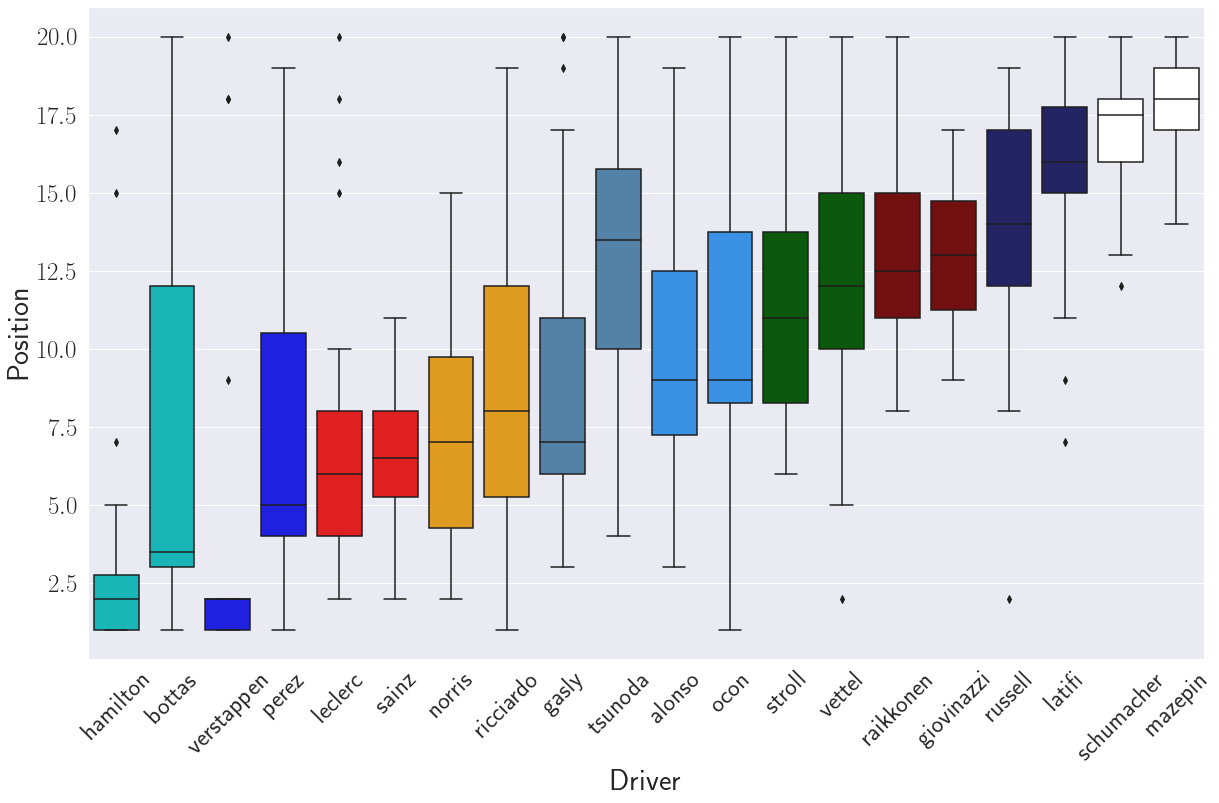

In [13]:

plt.figure(figsize=(20, 12))
sb.set(style="darkgrid")
my_pal = {
          "Mercedes": "darkturquoise","hamilton": "darkturquoise", "bottas": "darkturquoise",
          "Red Bull":"blue", "verstappen":"blue", "perez":"blue", 
          "Ferrari":"red","leclerc":"red", "sainz":"red",
          "McLaren":"orange","norris":"orange", "ricciardo":"orange", 
          "gasly":"steelblue","AlphaTauri":"steelblue","tsunoda":"steelblue",
          "Aston Martin":"darkgreen", "stroll":"darkgreen", "vettel":"darkgreen",
          "Alpine F1 Team":"dodgerblue", "ocon":"dodgerblue", "alonso":"dodgerblue", 
          "giovinazzi":"maroon", "Alfa Romeo" : "maroon", "raikkonen":"maroon","kubica":"maroon",
          "Williams":"midnightblue","russell":"midnightblue","latifi":"midnightblue",
          "Haas F1 Team":"white", "schumacher":"white","mazepin":"white" 
         }


sb.boxplot(x="driverRef", y="positionOrder", 
            order=['hamilton','bottas','verstappen','perez', 'leclerc', 'sainz', 'norris','ricciardo', 'gasly', 
                   'tsunoda','alonso','ocon','stroll', 'vettel','raikkonen','giovinazzi','russell','latifi',
                   'schumacher','mazepin'],
            data = driver_positions_count, palette = my_pal)
plt.tick_params(axis='x', rotation=45, labelsize = 25)
plt.tick_params(axis='y',  labelsize = 25)
plt.xlabel("Driver",fontsize=30)
plt.ylabel("Position",fontsize=30)
# plt.title("Position frequency of each driver in 2021",fontsize=60)
plt.savefig("../reports/figures/driver_positions" + ".eps")

In [14]:
data = data.iloc[: , 1:]
corr_dat = data.corr()
corr_dat_array = corr_dat
corr_dat_array = corr_dat_array.to_numpy()

In [15]:
corr_row = {}
i = 0
#getting all the correlations in regard to the final position
for column in corr_dat:
    corr_row[column] = corr_dat_array[3][i]
    i = i+1

In [16]:
# append the data set in order to sort it by the correlation values
data = data.append(corr_row, ignore_index=True)

In [17]:
corr_row_abs = corr_row

#make sure we filter for the absolute highest correlation
for key in corr_row_abs:
    corr_row_abs[key] = abs(corr_row_abs[key])

data = data.append(corr_row_abs, ignore_index=True)


In [18]:
#sorting the data by the last row and dropping NaNs
data = data.sort_values(data.last_valid_index(), axis=1)
data = data.drop(data.loc[:,data.iloc[-1].isna()], axis=1)

In [19]:
#select 10 highest r to be depicted in Data frame 
data = data[data.columns[-10:]]
data.drop(data.tail(2).index,inplace=True) # drop last 2 rows 

<AxesSubplot:>

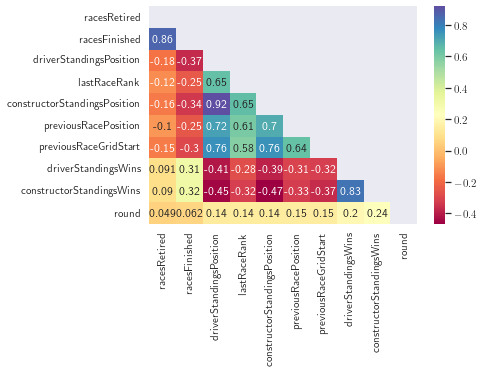

In [20]:
# Getting the Upper Triangle of the correlation matrix
corr_df = data.corr(method='pearson')
matrix = np.triu(corr_df)

# using the upper triangle matrix as mask 
sb.heatmap(corr_df, annot=True, mask=matrix, cmap = "Spectral")
